In [6]:
import networkx as nx
import numpy as np

In [7]:
class BarbasiAlbert: 
    def __init__(self, num_nodes:int, num_edges:int,random_seed:int, graph:nx.Graph) -> None:
        """calling the constructor of the graph """
        self.num_nodes = num_nodes 
        self.num_edges = num_edges 
        self.seed = np.random.seed(random_seed)
        self.graph = graph
        self.source_nodes = len(graph)
        self.repeated_nodes = self._get_repeated_nodes()
    
    def _get_repeated_nodes(self) -> list:
        """Function which gets the number of repeated nodes in the graph"""
        return [node for node, degree in self.graph.degree() for _ in range(degree)]

    def _get_random_node(self):
        """gets a subset to add a random edge and connection """
        subs = np.random.choice(self._get_repeated_nodes(), size=self.num_edges)
        return subs
    
    def _generate_graph(self):
        """Generates the BA graph"""
        ## set the repeated nodes to the function 
        
        ## condition holds true 
        while self.source_nodes < self.num_nodes:
            ## add the corresponding edges to the graph 
            # Code --> pick random node from the existing ones, of size m 
            self.graph.add_edges_from(zip([self.source_nodes]*self.num_edges, self._get_random_node()))
            ## extend the repeated nodes list 
            self.repeated_nodes.extend(self._get_random_node())
            ## extend the repeated nodes with source node * number_of_edges 
            self.repeated_nodes.extend([self.source_nodes] * self.num_edges)
            ## counter to increase the self.source_node 
            self.source_nodes += 1
        return self.graph 
    

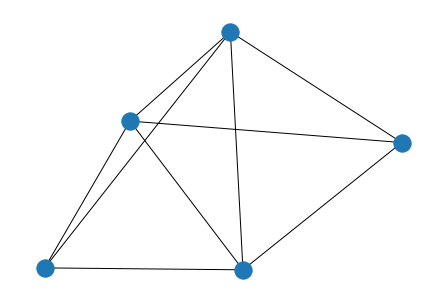

In [14]:
NODES = 50
EDGES = 5
## generate a random graph from a numpy matrix with no self loops 
mat = np.random.randint(5, size=(5,5))
## remove the self-loops 
np.fill_diagonal(mat, 0)
## convert into a graph 
g = nx.from_numpy_matrix(mat)
## display graph 
nx.draw(g)

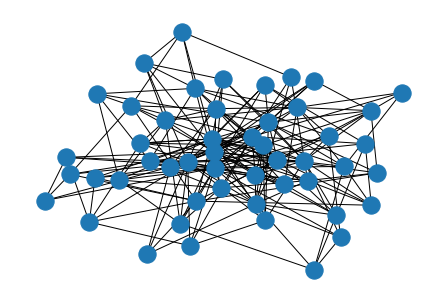

In [15]:
## instantiate a Barbasi-Albert Graph 
G = BarbasiAlbert(num_nodes = NODES, 
                  num_edges = EDGES,
                  random_seed = 42,
                  graph=g)._generate_graph()
nx.draw(G)